In [ ]:
# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt

# Import pandas under the abbreviation 'pd'
import pandas as pd

# Import NumPy under the abbreviation 'np'
import numpy as np

In [ ]:
# Extract and visualize information t

raw= pd.read_csv("https://gist.githubusercontent.com/javierIA/7d8564f02ae92bf722800465da2d0f7a/raw/6e0b018296ba1bafe2f20319c9f3e3a8573b151e/salarios.csv")
raw

,edad,estudio,horas,clase_salario,valor_salario
0,27,9,40,0,12967.33
1,30,9,40,0,20171.40
2,42,9,40,1,39051.04
3,68,9,25,1,33567.25
4,34,8,40,0,8247.42
...,...,...,...,...,...
95,32,13,55,0,3297.72
96,20,10,25,0,2266.79
97,46,3,40,0,17190.41
98,37,9,45,0,552.72


In [ ]:
# Check for total null values in each column and describe data
null_counts = raw.isnull().sum()

print("Total null values in each column:")
print(null_counts)

raw.describe()

Total null values in each column:
edad             0
estudio          0
horas            0
clase_salario    0
valor_salario    0
dtype: int64


,edad,estudio,horas,clase_salario,valor_salario
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,39.740000,9.590000,40.550000,0.300000,16845.790640
std,15.959937,3.008725,12.130915,0.460566,12264.102806
min,17.000000,1.000000,1.000000,0.000000,552.720000
25%,27.000000,9.000000,40.000000,0.000000,5949.565000
50%,35.500000,9.000000,40.000000,0.000000,14097.625000
75%,52.250000,10.000000,45.000000,1.000000,26873.982500
max,80.000000,16.000000,72.000000,1.000000,50000.000000


In [ ]:
# Divide set into features and labels.
raw_features = raw[['horas', 'edad', 'estudio']]
raw_label = raw["valor_salario"]

# Preprocesamiento: a. Importa las bibliotecas necesarias (pandas, numpy, scikit-learn). b. Carga el conjunto de datos en un DataFrame. c. Separa las características (X) de la variable objetivo (y = valor_salario). Completado


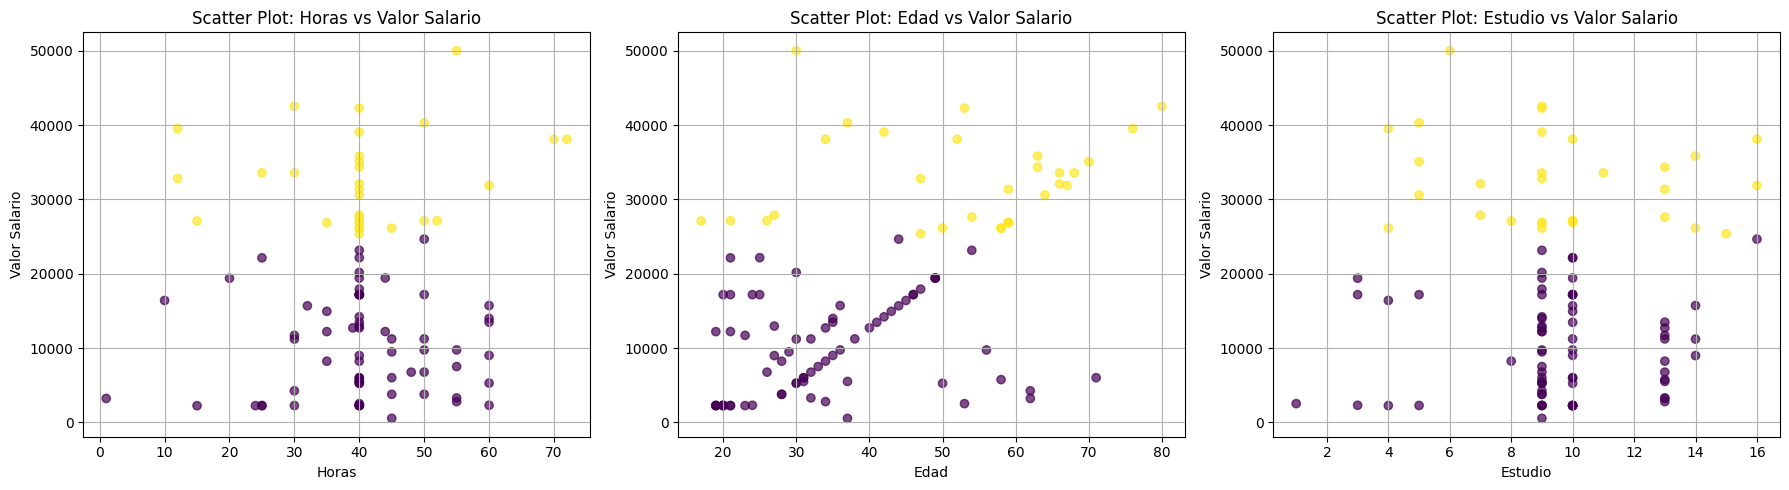

In [ ]:
# Data visualization using Matplotlib
fig, axes = plt.subplots(1, len(raw_features.columns), figsize=(18, 5))

for col, column in enumerate(raw_features.columns):
    axes[col].scatter(raw_features[column], raw['valor_salario'], c=raw['clase_salario'], cmap='viridis', alpha=0.7)
    axes[col].set_xlabel(column.capitalize())
    axes[col].set_ylabel('Valor Salario')
    axes[col].set_title(f'Scatter Plot: {column.capitalize()} vs Valor Salario')
    axes[col].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

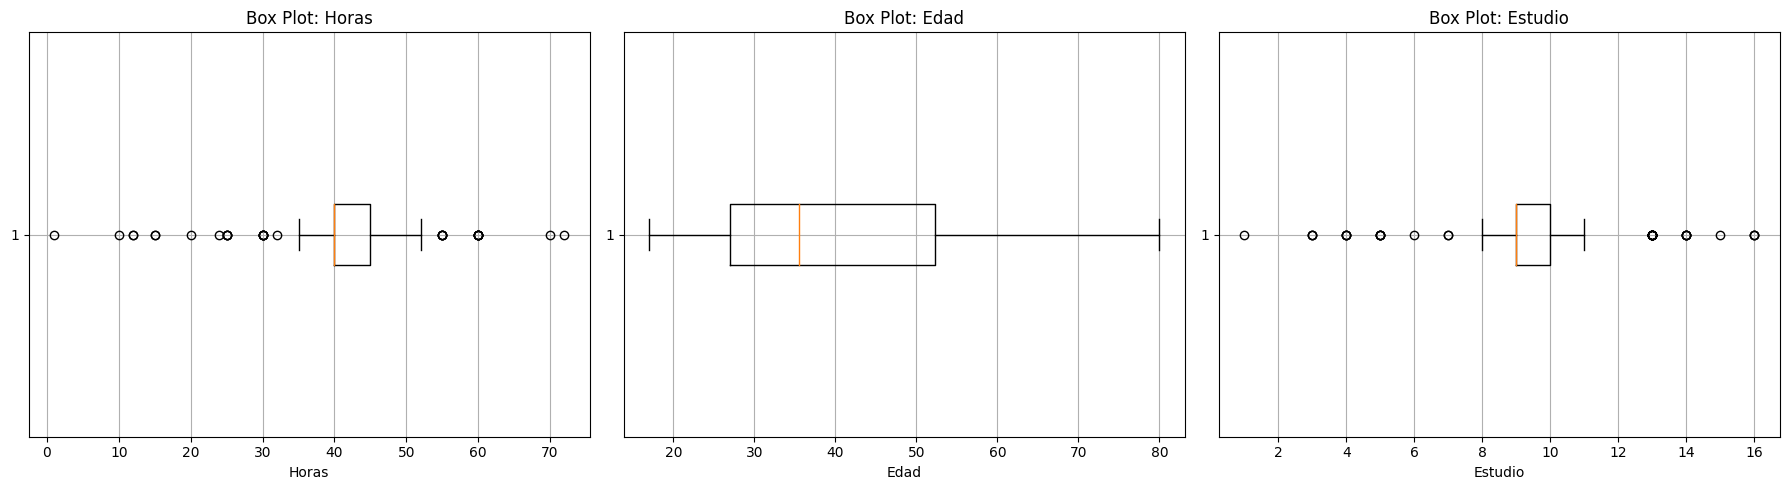

In [ ]:
# Create a box plot
fig, axes = plt.subplots(1, len(raw_features.columns), figsize=(18, 5))

for col, column in enumerate(raw_features.columns):
    boxplot = axes[col].boxplot(raw_features[column], vert=False)
    axes[col].set_title(f'Box Plot: {column.capitalize()}')
    axes[col].set_xlabel(column.capitalize())
    axes[col].grid(True)

plt.tight_layout()
plt.show()

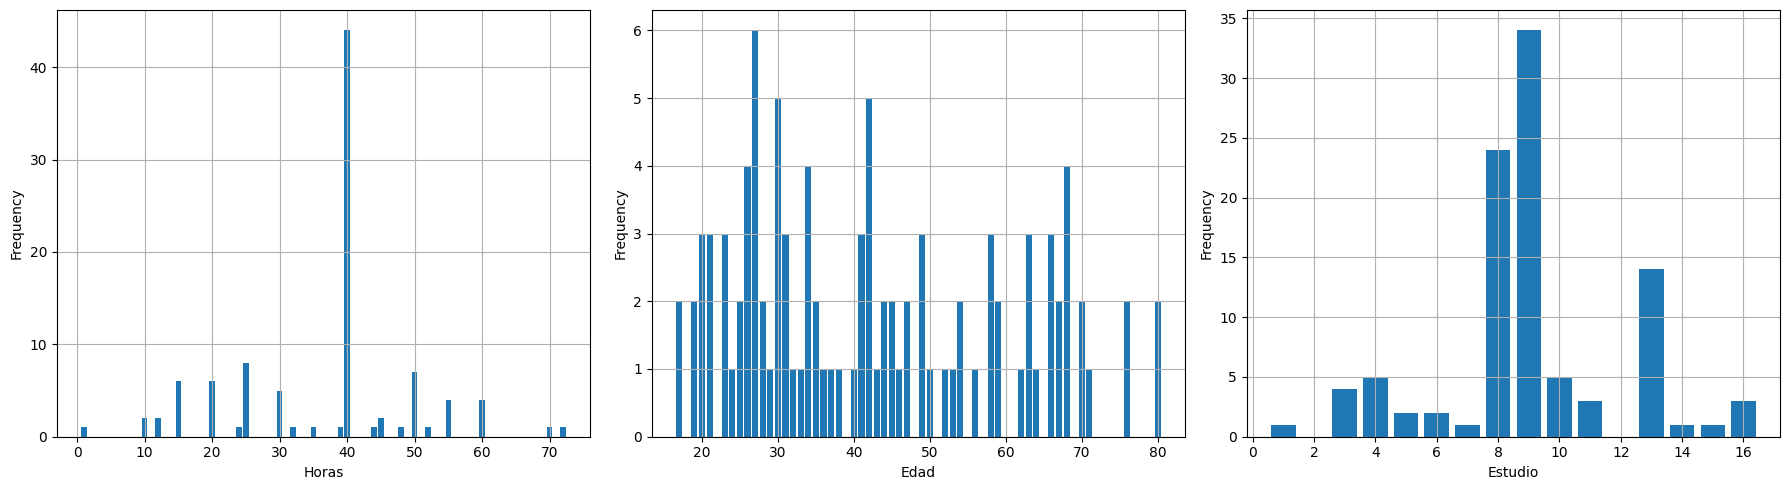

In [ ]:
# Create a bar plot
fig, axes = plt.subplots(1, len(raw_features.columns), figsize=(18, 5))

for col, column in enumerate(raw_features.columns):
    unique_values = raw_features[column].unique()
    value_counts = raw_features[column].value_counts()

    axes[col].bar(unique_values, value_counts)
    axes[col].set_xlabel(column.capitalize())
    axes[col].set_ylabel('Frequency')
    axes[col].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Import the linear_model module from sklearn for linear regression
from sklearn import linear_model

# Import the train_test_split function from the model_selection submodule of sklearn
from sklearn.model_selection import train_test_split

# Divide features and labels

x_train, x_test, y_train, y_test = train_test_split(raw_features, raw_label, test_size = 0.20)

# División de datos: a. Divide el conjunto de datos en conjuntos de entrenamiento y prueba (80%-20%). Completado


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Create instances of the linear regression models
ols_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# We can now use these models for data exploration and machine learning development.


#Evalúa el rendimiento del modelo en el conjunto de prueba usando el error cuadrático medio (MSE).

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

models = [
    ols_model, ridge_model, lasso_model, elasticnet_model
]

model_scores = []

# Train and Evaluate Models
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_scores.append((model.__class__.__name__, mse, r2))

# Sort models based on R-squared score
sorted_models = sorted(model_scores, key=lambda x: x[2], reverse=True)

# Print results in sorted order
for model_name, mse, r2 in sorted_models:
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")
    print("---------------------------------------------------------------")

Model: LinearRegression
Mean Squared Error: 91347557.11, R-squared: 0.35
---------------------------------------------------------------
Model: Lasso
Mean Squared Error: 91347699.13, R-squared: 0.35
---------------------------------------------------------------
Model: Ridge
Mean Squared Error: 91348319.76, R-squared: 0.35
---------------------------------------------------------------
Model: ElasticNet
Mean Squared Error: 91378636.16, R-squared: 0.35
---------------------------------------------------------------


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Standardize the features
Standard_scaler = StandardScaler()
x_train_SS = Standard_scaler.fit_transform(x_train)
X_test_SS = Standard_scaler.transform(x_test)

# Robust Scaler
Robust_scaler = RobustScaler()
x_train_RS = Robust_scaler.fit_transform(x_train)
X_test_RS = Robust_scaler.transform(x_test)

# Min Max Scaler
MinMax_scaler = MinMaxScaler()
x_train_MMS = MinMax_scaler.fit_transform(x_train)
X_test_MMS = MinMax_scaler.transform(x_test)


# Optimización: a. Aplica una técnica de normalización o estandarización a tus características y repite el paso 3. ¿Mejoró el rendimiento del modelo?

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define the models
models = [
    ols_model, ridge_model, lasso_model, elasticnet_model
]

# Define the scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "MinMaxScaler": MinMaxScaler()
}

# Store model scores
model_scores = {scaler_name: [] for scaler_name in scalers}

# Iterate over each scaler and model
for scaler_name, scaler in scalers.items():
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for model in models:
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        model_scores[scaler_name].append((model.__class__.__name__, mse, r2))

# Sort models based on R-squared score for each scaler
sorted_model_scores = {
    scaler_name: sorted(scores, key=lambda x: x[2], reverse=True)
    for scaler_name, scores in model_scores.items()
}

# Print results for each scaler
for scaler_name, sorted_models in sorted_model_scores.items():
    print(f"Results using {scaler_name}:")
    for model_name, mse, r2 in sorted_models:
        print(f"Model: {model_name}")
        print(f"Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")
        print("---------------------------------------------------------------")


Results using StandardScaler:
Model: LinearRegression
Mean Squared Error: 91347557.11, R-squared: 0.35
---------------------------------------------------------------
Model: Lasso
Mean Squared Error: 91349868.71, R-squared: 0.35
---------------------------------------------------------------
Model: Ridge
Mean Squared Error: 91548054.17, R-squared: 0.35
---------------------------------------------------------------
Model: ElasticNet
Mean Squared Error: 100759785.31, R-squared: 0.28
---------------------------------------------------------------
Results using RobustScaler:
Model: LinearRegression
Mean Squared Error: 91347557.11, R-squared: 0.35
---------------------------------------------------------------
Model: Lasso
Mean Squared Error: 91351128.27, R-squared: 0.35
---------------------------------------------------------------
Model: Ridge
Mean Squared Error: 91800669.75, R-squared: 0.35
---------------------------------------------------------------
Model: ElasticNet
Mean Squared E



### Parte 1: Regresión

**Objetivo:** Predice el `valor_salario` basándote en las otras características del conjunto de datos.

1. **Preprocesamiento**:
   a. Importa las bibliotecas necesarias (pandas, numpy, scikit-learn).
   b. Carga el conjunto de datos en un DataFrame.
   c. Separa las características (X) de la variable objetivo (y = `valor_salario`).
   
2. **División de datos**:
   a. Divide el conjunto de datos en conjuntos de entrenamiento y prueba (80%-20%).

3. **Modelo de regresión**:
   a. Utiliza una regresión lineal para entrenar un modelo con el conjunto de entrenamiento.
   b. Evalúa el rendimiento del modelo en el conjunto de prueba usando el error cuadrático medio (MSE).
   
4. **Optimización**:
   a. Aplica una técnica de normalización o estandarización a tus características y repite el paso 3. ¿Mejoró el rendimiento del modelo?

### Parte 2: Clasificación

**Objetivo:** Predice la `clase_salario` basándote en las otras características del conjunto de datos.

1. **Preprocesamiento**:
   a. Para este objetivo, tu variable objetivo será `clase_salario`. Sepárala de las características.
   
2. **División de datos**:
   a. Divide el conjunto de datos en conjuntos de entrenamiento y prueba (80%-20%).

3. **Modelo de clasificación**:
   a. Utiliza un modelo de regresión logística para entrenar con el conjunto de entrenamiento.
   b. Evalúa el rendimiento del modelo en el conjunto de prueba usando precisión, recall y F1-score.
   
4. **Optimización y comparación**:
   a. Entrena otro modelo de clasificación de tu elección (por ejemplo, árbol de decisión, SVM, etc.) y compara su rendimiento con el modelo de regresión logística.
   b. ¿Qué modelo tuvo el mejor rendimiento? ¿Por qué crees que ese modelo fue el mejor para este conjunto de datos?

### Pregunta reflexiva:

5. ¿Qué características crees que tienen la mayor influencia en el `valor_salario` y `clase_salario` de un individuo? Justifica tu respuesta basándote en los resultados de tus modelos y/o cualquier otro análisis adicional que quieras realizar.


Parte 2: Clasificación


# 1 Preprocesamiento: a. Para este objetivo, tu variable objetivo será clase_salario. Sepárala de las características.

In [ ]:
# set features and labels dataset
df = raw

df_features = ['edad',	'estudio',	'horas', 'valor_salario']

df_label = ['clase_salario']


# 2 División de datos: a. Divide el conjunto de datos en conjuntos de entrenamiento y prueba (80%-20%).

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and labels (y)
X = df.drop("clase_salario", axis=1)
y = df["clase_salario"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3 Modelo de clasificación: a. Utiliza un modelo de regresión logística para entrenar con el conjunto de entrenamiento. b. Evalúa el rendimiento del modelo en el conjunto de prueba usando precisión, recall y F1-score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)

# Models Initialization
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier()
naive_bayes_model = GaussianNB()

models = [
    logistic_regression_model, random_forest_model, gradient_boosting_model,
    svm_model, decision_tree_model
]

model_scores = []

# Train and Evaluate Models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_scores.append((model.__class__.__name__, accuracy, precision, recall, f1))

# Sort models based on F1-score
sorted_models = sorted(model_scores, key=lambda x: x[4], reverse=True)

# Print results in sorted order
for model_name, accuracy, precision, recall, f1 in sorted_models:
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")
    print("---------------------------------------------------------------")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00
---------------------------------------------------------------
Model: RandomForestClassifier
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00
---------------------------------------------------------------
Model: GradientBoostingClassifier
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00
---------------------------------------------------------------
Model: SVC
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00
---------------------------------------------------------------
Model: DecisionTreeClassifier
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-score: 1.00
---------------------------------------------------------------


Model: LogisticRegression
True Positive: 9, True Negative: 11, False Positive: 0, False Negative: 0
---------------------------------------------------------------
Model: RandomForestClassifier
True Positive: 9, True Negative: 11, False Positive: 0, False Negative: 0
---------------------------------------------------------------
Model: GradientBoostingClassifier
True Positive: 9, True Negative: 11, False Positive: 0, False Negative: 0
---------------------------------------------------------------
Model: SVC
True Positive: 9, True Negative: 11, False Positive: 0, False Negative: 0
---------------------------------------------------------------
Model: DecisionTreeClassifier
True Positive: 9, True Negative: 11, False Positive: 0, False Negative: 0
---------------------------------------------------------------


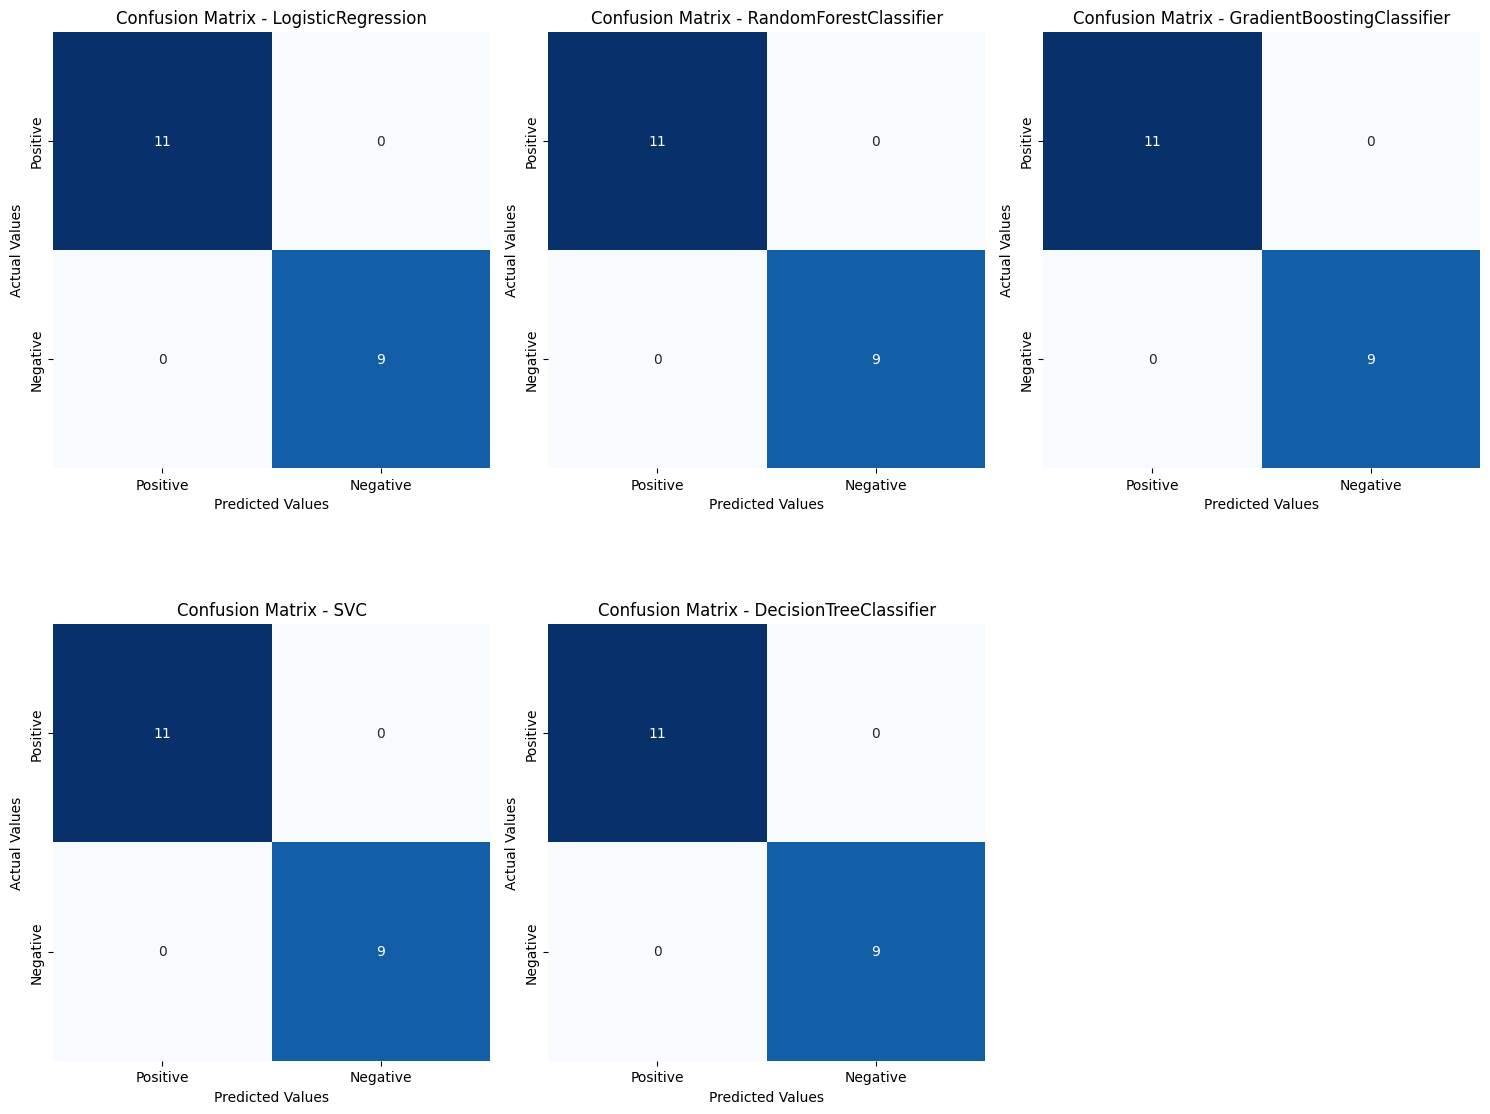

In [ ]:
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(ax, model, model_name, X_test, y_test, classes):
    y_pred = model.predict(X_test)
    confusion_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    ax.set_title(f'Confusion Matrix - {model_name}')

    # Extract TP, TN, FP, FN values
    tp = confusion_mat[1, 1]
    tn = confusion_mat[0, 0]
    fp = confusion_mat[0, 1]
    fn = confusion_mat[1, 0]

    print(f"Model: {model_name}")
    print(f"True Positive: {tp}, True Negative: {tn}, False Positive: {fp}, False Negative: {fn}")
    print("---------------------------------------------------------------")

def plot_models_confusion_matrices(models, X_test, y_test):
    # Define class labels
    classes = ['Positive', 'Negative']

    # Calculate the number of rows and columns for subplots
    num_models = len(models)
    num_cols = 3
    num_rows = math.ceil(num_models / num_cols)

    # Create a figure with subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))

    # Visualize confusion matrix for each model (sorted)
    for i, (model_name, _, _, _, _) in enumerate(sorted_models):
        model = next(model for model in models if model.__class__.__name__ == model_name)
        row_idx = i // num_cols
        col_idx = i % num_cols
        plot_confusion_matrix(axs[row_idx, col_idx], model, model_name, X_test, y_test, classes)

    # Remove any empty subplots
    for i in range(num_models, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.show()

# Example usage
plot_models_confusion_matrices(models, X_test, y_test)  # Replace models, X_test, and y_test with your actual data


# Opcional

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
import joblib


# Cargamos los datos
data = raw
X = data.drop(columns=["clase_salario", "valor_salario"])
y_reg = data["valor_salario"]
y_class = data["clase_salario"]

# Dividimos los datos
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Creando el pipeline para regresión
pipeline_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
pipeline_reg.fit(X_train_reg, y_train_reg)

# Creando el pipeline para clasificación
pipeline_class = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=10000))
])
pipeline_class.fit(X_train_class, y_train_class)

# Exportando los modelos
joblib.dump(pipeline_reg, 'modelo_regresion.pkl')
joblib.dump(pipeline_class, 'modelo_clasificacion.pkl')


['modelo_clasificacion.pkl']